# Model Selector with PDF Report Generator

This notebook allows you to:
- Select any regression model from 1-10
- Train the selected model with hyperparameter tuning
- Generate comprehensive performance metrics
- Create a professional PDF report with plots and analysis

## Features:
- Interactive model selection menu
- Automated hyperparameter tuning
- Comprehensive visualizations
- Professional PDF report generation

## 1. Import Required Libraries

In [44]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from matplotlib.backends.backend_pdf import PdfPages
from scipy import stats
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Interactive Model Selector Class Definition

In [45]:
class InteractiveModelSelector:
    def __init__(self, data_path):
        self.data_path = data_path
        self.models = {
            1: ('Linear Regression', LinearRegression(), {}),
            2: ('Ridge Regression', Ridge(), {'alpha': [0.1, 1.0, 10.0, 100.0]}),
            3: ('Lasso Regression', Lasso(), {'alpha': [0.1, 1.0, 10.0, 100.0]}),
            4: ('ElasticNet', ElasticNet(), {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]}),
            5: ('Random Forest', RandomForestRegressor(random_state=42), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
            6: ('Gradient Boosting', GradientBoostingRegressor(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
            7: ('Extra Trees', ExtraTreesRegressor(random_state=42), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
            8: ('Decision Tree', DecisionTreeRegressor(random_state=42), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}),
            9: ('K-Neighbors', KNeighborsRegressor(), {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}),
            10: ('Support Vector', SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']})
        }
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.selected_model = None
        self.trained_model = None
        self.predictions = None
        self.metrics = {}
        
    def load_data(self):
        """Load and prepare the dataset"""
        print("📊 Loading dataset...")
        df = pd.read_csv(self.data_path)
        
        X = df.iloc[:, :-1]
        y = df.iloc[:, -1]
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
        print(f"✅ Data loaded successfully!")
        print(f"📈 Training set: {self.X_train.shape}")
        print(f"📉 Test set: {self.X_test.shape}")
        
        # Display dataset info
        display(HTML(f"""
        <div style="background-color: #e7f3ff; padding: 15px; border-radius: 10px; margin: 10px 0;">
            <h3>📋 Dataset Summary</h3>
            <ul>
                <li><strong>Total Samples:</strong> {df.shape[0]}</li>
                <li><strong>Features:</strong> {X.shape[1]}</li>
                <li><strong>Training Samples:</strong> {self.X_train.shape[0]}</li>
                <li><strong>Test Samples:</strong> {self.X_test.shape[0]}</li>
                <li><strong>Target Variable:</strong> Last Column</li>
            </ul>
        </div>
        """))
        
    def display_models(self):
        """Display available models for user selection"""
        model_html = """
        <div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; margin: 10px 0;">
            <h2 style="color: #2c5aa0;">🤖 Available Regression Models</h2>
            <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
                <tr style="background-color: #2c5aa0; color: white;">
                    <th style="padding: 10px; border: 1px solid #ddd;">ID</th>
                    <th style="padding: 10px; border: 1px solid #ddd;">Model Name</th>
                    <th style="padding: 10px; border: 1px solid #ddd;">Type</th>
                </tr>
        """
        
        model_types = {
            1: "Linear", 2: "Regularized", 3: "Regularized", 4: "Regularized",
            5: "Ensemble", 6: "Ensemble", 7: "Ensemble", 8: "Tree-based",
            9: "Instance-based", 10: "Support Vector"
        }
        
        for idx, (name, _, _) in self.models.items():
            bg_color = "#f9f9f9" if idx % 2 == 0 else "#ffffff"
            model_html += f"""
                <tr style="background-color: {bg_color};">
                    <td style="padding: 8px; border: 1px solid #ddd; text-align: center;"><strong>{idx}</strong></td>
                    <td style="padding: 8px; border: 1px solid #ddd;">{name}</td>
                    <td style="padding: 8px; border: 1px solid #ddd;">{model_types[idx]}</td>
                </tr>
            """
        
        model_html += """
            </table>
        </div>
        """
        
        display(HTML(model_html))
        
    def select_model(self, model_id):
        """Select a model by ID"""
        if model_id in self.models:
            self.selected_model = model_id
            model_name = self.models[model_id][0]
            
            display(HTML(f"""
            <div style="background-color: #d4edda; padding: 15px; border-radius: 10px; margin: 10px 0; border-left: 5px solid #28a745;">
                <h3 style="color: #155724; margin: 0;">✅ Model Selected: {model_name}</h3>
                <p style="margin: 5px 0 0 0;">Ready to begin training with hyperparameter optimization!</p>
            </div>
            """))
            return True
        else:
            display(HTML(f"""
            <div style="background-color: #f8d7da; padding: 15px; border-radius: 10px; margin: 10px 0; border-left: 5px solid #dc3545;">
                <h3 style="color: #721c24; margin: 0;">❌ Invalid Selection</h3>
                <p style="margin: 5px 0 0 0;">Please select a model ID between 1 and {len(self.models)}</p>
            </div>
            """))
            return False
        
    def train_model(self):
        """Train the selected model with hyperparameter tuning"""
        if self.selected_model is None:
            print("❌ Please select a model first!")
            return
            
        model_name, model, params = self.models[self.selected_model]
        
        display(HTML(f"""
        <div style="background-color: #fff3cd; padding: 15px; border-radius: 10px; margin: 10px 0; border-left: 5px solid #ffc107;">
            <h3 style="color: #856404; margin: 0;">🔄 Training {model_name}...</h3>
            <p style="margin: 5px 0 0 0;">Performing hyperparameter tuning with 3-fold cross-validation</p>
        </div>
        """))
        
        # Create pipeline with scaling
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])
        
        # Prepare parameters for GridSearchCV
        param_grid = {f'regressor__{k}': v for k, v in params.items()} if params else {}
        
        # Perform GridSearchCV
        if param_grid:
            grid_search = GridSearchCV(
                pipe, 
                param_grid=param_grid, 
                scoring='neg_mean_squared_error',
                cv=3,
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(self.X_train, self.y_train)
            self.trained_model = grid_search.best_estimator_
            
            # Display best parameters
            best_params_html = "<ul>"
            for param, value in grid_search.best_params_.items():
                best_params_html += f"<li><strong>{param.replace('regressor__', '')}:</strong> {value}</li>"
            best_params_html += "</ul>"
            
            display(HTML(f"""
            <div style="background-color: #d1ecf1; padding: 15px; border-radius: 10px; margin: 10px 0; border-left: 5px solid #17a2b8;">
                <h3 style="color: #0c5460; margin: 0;">🎯 Best Hyperparameters Found:</h3>
                {best_params_html}
            </div>
            """))
        else:
            pipe.fit(self.X_train, self.y_train)
            self.trained_model = pipe
            
        # Make predictions
        self.predictions = self.trained_model.predict(self.X_test)
        
        # Calculate metrics
        self.calculate_metrics()
        
        display(HTML(f"""
        <div style="background-color: #d4edda; padding: 15px; border-radius: 10px; margin: 10px 0; border-left: 5px solid #28a745;">
            <h3 style="color: #155724; margin: 0;">🎉 Training Completed Successfully!</h3>
            <p style="margin: 5px 0 0 0;">Model is ready for evaluation and report generation.</p>
        </div>
        """))
        
    def calculate_metrics(self):
        """Calculate performance metrics"""
        self.metrics = {
            'RMSE': np.sqrt(mean_squared_error(self.y_test, self.predictions)),
            'R2': r2_score(self.y_test, self.predictions),
            'MAE': mean_absolute_error(self.y_test, self.predictions),
            'MSE': mean_squared_error(self.y_test, self.predictions)
        }
        
    def display_results(self):
        """Display model performance results in attractive format"""
        if not self.metrics:
            print("❌ No metrics available. Please train a model first!")
            return
            
        model_name = self.models[self.selected_model][0]
        
        # Determine performance level
        r2_score = self.metrics['R2']
        if r2_score >= 0.9:
            performance = "Excellent"
            color = "#28a745"
        elif r2_score >= 0.8:
            performance = "Good"
            color = "#17a2b8"
        elif r2_score >= 0.7:
            performance = "Fair"
            color = "#ffc107"
        else:
            performance = "Needs Improvement"
            color = "#dc3545"
        
        results_html = f"""
        <div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin: 10px 0; border: 2px solid {color};">
            <h2 style="color: {color}; text-align: center; margin: 0 0 20px 0;">📊 {model_name} Performance Report</h2>
            
            <div style="display: flex; justify-content: center; margin-bottom: 20px;">
                <div style="background-color: {color}; color: white; padding: 10px 20px; border-radius: 25px; font-weight: bold;">
                    Overall Performance: {performance}
                </div>
            </div>
            
            <table style="width: 100%; border-collapse: collapse; margin-top: 15px;">
                <tr style="background-color: {color}; color: white;">
                    <th style="padding: 12px; border: 1px solid #ddd; text-align: left;">Metric</th>
                    <th style="padding: 12px; border: 1px solid #ddd; text-align: center;">Value</th>
                    <th style="padding: 12px; border: 1px solid #ddd; text-align: left;">Interpretation</th>
                </tr>
                <tr style="background-color: #ffffff;">
                    <td style="padding: 10px; border: 1px solid #ddd;"><strong>R² Score</strong></td>
                    <td style="padding: 10px; border: 1px solid #ddd; text-align: center; font-weight: bold;">{self.metrics['R2']:.4f}</td>
                    <td style="padding: 10px; border: 1px solid #ddd;">Explains {self.metrics['R2']*100:.2f}% of variance</td>
                </tr>
                <tr style="background-color: #f8f9fa;">
                    <td style="padding: 10px; border: 1px solid #ddd;"><strong>RMSE</strong></td>
                    <td style="padding: 10px; border: 1px solid #ddd; text-align: center; font-weight: bold;">{self.metrics['RMSE']:.4f}</td>
                    <td style="padding: 10px; border: 1px solid #ddd;">Average prediction error</td>
                </tr>
                <tr style="background-color: #ffffff;">
                    <td style="padding: 10px; border: 1px solid #ddd;"><strong>MAE</strong></td>
                    <td style="padding: 10px; border: 1px solid #ddd; text-align: center; font-weight: bold;">{self.metrics['MAE']:.4f}</td>
                    <td style="padding: 10px; border: 1px solid #ddd;">Mean absolute deviation</td>
                </tr>
                <tr style="background-color: #f8f9fa;">
                    <td style="padding: 10px; border: 1px solid #ddd;"><strong>MSE</strong></td>
                    <td style="padding: 10px; border: 1px solid #ddd; text-align: center; font-weight: bold;">{self.metrics['MSE']:.4f}</td>
                    <td style="padding: 10px; border: 1px solid #ddd;">Mean squared error</td>
                </tr>
            </table>
        </div>
        """
        
        display(HTML(results_html))

## 3. Plotting Functions for Visualizations

In [46]:
def create_plots(selector, pdf_pages):
    """Create comprehensive plots for the PDF report"""
    model_name = selector.models[selector.selected_model][0]
    
    # Set up the plotting style
    plt.style.use('seaborn-v0_8')
    
    # Plot 1: Actual vs Predicted
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(selector.y_test, selector.predictions, alpha=0.6, c=selector.predictions, cmap='viridis')
    ax.plot([selector.y_test.min(), selector.y_test.max()], [selector.y_test.min(), selector.y_test.max()], 'r--', lw=2)
    ax.set_xlabel('Actual Values', fontsize=12)
    ax.set_ylabel('Predicted Values', fontsize=12)
    ax.set_title(f'{model_name}: Actual vs Predicted Values', fontsize=14, fontweight='bold')
    plt.colorbar(scatter, label='Predicted Values')
    ax.grid(True, alpha=0.3)
    
    # Add R² annotation
    ax.text(0.05, 0.95, f'R² = {selector.metrics["R2"]:.4f}', 
            transform=ax.transAxes, fontsize=12, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    plt.tight_layout()
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot 2: Residuals vs Predicted
    fig, ax = plt.subplots(figsize=(10, 8))
    residuals = selector.y_test - selector.predictions
    ax.scatter(selector.predictions, residuals, alpha=0.6, c='blue')
    ax.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax.set_xlabel('Predicted Values', fontsize=12)
    ax.set_ylabel('Residuals', fontsize=12)
    ax.set_title(f'{model_name}: Residual Plot', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot 3: Residuals Distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Histogram
    ax1.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax1.set_xlabel('Residuals', fontsize=12)
    ax1.set_ylabel('Frequency', fontsize=12)
    ax1.set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    
    # Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot of Residuals', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.show()
    plt.close()
    
    # Plot 4: Feature Importance (if available)
    if hasattr(selector.trained_model.named_steps['regressor'], 'feature_importances_'):
        fig, ax = plt.subplots(figsize=(12, 8))
        feature_names = selector.X_train.columns
        importances = selector.trained_model.named_steps['regressor'].feature_importances_
        
        # Sort features by importance
        indices = np.argsort(importances)[::-1]
        
        ax.bar(range(len(importances)), importances[indices], alpha=0.7, color='green')
        ax.set_xlabel('Feature Index', fontsize=12)
        ax.set_ylabel('Feature Importance', fontsize=12)
        ax.set_title(f'{model_name}: Feature Importance', fontsize=14, fontweight='bold')
        ax.set_xticks(range(len(importances)))
        ax.set_xticklabels([feature_names[i] for i in indices], rotation=45, ha='right')
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        pdf_pages.savefig(fig, bbox_inches='tight')
        plt.show()
        plt.close()
    
    # Plot 5: Model Performance Summary
    fig, ax = plt.subplots(figsize=(12, 8))
    
    metrics_names = ['RMSE', 'MAE', 'MSE']
    metrics_values = [selector.metrics[metric] for metric in metrics_names]
    
    bars = ax.bar(metrics_names, metrics_values, alpha=0.7, color=['red', 'orange', 'purple'])
    ax.set_ylabel('Error Value', fontsize=12)
    ax.set_title(f'{model_name}: Performance Metrics Summary', fontsize=14, fontweight='bold')
    
    # Add value labels on bars
    for bar, value in zip(bars, metrics_values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
               f'{value:.4f}', ha='center', va='bottom', fontweight='bold')
    
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.show()
    plt.close()

def create_summary_page(selector, pdf_pages):
    """Create a summary page with model details"""
    model_name = selector.models[selector.selected_model][0]
    
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.axis('off')
    
    # Title
    fig.suptitle(f'Model Performance Report: {model_name}', 
                fontsize=20, fontweight='bold', y=0.95)
    
    # Model Details
    details_text = f"""
MODEL DETAILS:
• Algorithm: {model_name}
• Training Samples: {len(selector.X_train)}
• Test Samples: {len(selector.X_test)}
• Features: {selector.X_train.shape[1]}

PERFORMANCE METRICS:
• Root Mean Square Error (RMSE): {selector.metrics['RMSE']:.4f}
• R² Score: {selector.metrics['R2']:.4f}
• Mean Absolute Error (MAE): {selector.metrics['MAE']:.4f}
• Mean Square Error (MSE): {selector.metrics['MSE']:.4f}

INTERPRETATION:
• R² Score of {selector.metrics['R2']:.4f} means the model explains {selector.metrics['R2']*100:.2f}% of the variance
• RMSE of {selector.metrics['RMSE']:.4f} indicates average prediction error
• Lower RMSE and MAE values indicate better model performance
• R² closer to 1.0 indicates better model fit

DATASET INFORMATION:
• Target Variable: Last Column
• Problem Type: Regression
• Cross-validation: 3-fold GridSearchCV used for hyperparameter tuning
"""
    
    ax.text(0.1, 0.8, details_text, fontsize=12, fontfamily='monospace',
            verticalalignment='top', transform=ax.transAxes,
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    
    plt.tight_layout()
    pdf_pages.savefig(fig, bbox_inches='tight')
    plt.show()
    plt.close()

def generate_pdf_report(selector):
    """Generate comprehensive PDF report"""
    if selector.selected_model is None or selector.trained_model is None:
        print("❌ Please train a model first before generating report!")
        return None
        
    model_name = selector.models[selector.selected_model][0]
    filename = f"{model_name.replace(' ', '_').lower()}_model_report.pdf"
    
    display(HTML(f"""
    <div style="background-color: #d1ecf1; padding: 15px; border-radius: 10px; margin: 10px 0; border-left: 5px solid #17a2b8;">
        <h3 style="color: #0c5460; margin: 0;">📄 Generating PDF Report: {filename}</h3>
        <p style="margin: 5px 0 0 0;">Creating comprehensive visualizations and analysis...</p>
    </div>
    """))
    
    with PdfPages(filename) as pdf:
        # Create summary page
        create_summary_page(selector, pdf)
        
        # Create plots
        create_plots(selector, pdf)
        
    display(HTML(f"""
    <div style="background-color: #d4edda; padding: 15px; border-radius: 10px; margin: 10px 0; border-left: 5px solid #28a745;">
        <h3 style="color: #155724; margin: 0;">✅ PDF Report Generated Successfully!</h3>
        <p style="margin: 5px 0 0 0;"><strong>File:</strong> {filename}</p>
        <p style="margin: 5px 0 0 0;">The report includes summary, visualizations, and detailed analysis.</p>
    </div>
    """))
    
    return filename

## 4. Initialize the Model Selector

**Important:** Update the data path to match your dataset location.

In [47]:
# Initialize the Interactive Model Selector
# Update the path to your dataset
DATA_PATH = "ml_optimized_concrete_10000.csv"  # Change this to your actual data path

selector = InteractiveModelSelector(DATA_PATH)

print("🚀 Interactive Model Selector initialized!")
print("📁 Data path:", DATA_PATH)

🚀 Interactive Model Selector initialized!
📁 Data path: ml_optimized_concrete_10000.csv


## 5. Load Dataset

In [48]:
# Load the dataset
selector.load_data()

📊 Loading dataset...
✅ Data loaded successfully!
📈 Training set: (8155, 12)
📉 Test set: (2039, 12)


## 6. Display Available Models

In [49]:
# Display all available models
selector.display_models()

ID,Model Name,Type
1,Linear Regression,Linear
2,Ridge Regression,Regularized
3,Lasso Regression,Regularized
4,ElasticNet,Regularized
5,Random Forest,Ensemble
6,Gradient Boosting,Ensemble
7,Extra Trees,Ensemble
8,Decision Tree,Tree-based
9,K-Neighbors,Instance-based
10,Support Vector,Support Vector


## 7. Select Your Model

**Instructions:** Change the `model_id` to the model you want to train (1-10).

In [50]:
print("Select your model:")
print("1: Linear Regression")
print("2: Ridge Regression") 
print("3: Lasso Regression")
print("4: ElasticNet")
print("5: Random Forest")
print("6: Gradient Boosting")
print("7: Extra Trees")
print("8: Decision Tree")
print("9: K-Neighbors")
print("10: Support Vector")

# Get user input
model_id = int(input("Enter model ID (1-10): "))
selector.select_model(model_id)

Select your model:
1: Linear Regression
2: Ridge Regression
3: Lasso Regression
4: ElasticNet
5: Random Forest
6: Gradient Boosting
7: Extra Trees
8: Decision Tree
9: K-Neighbors
10: Support Vector


True

## 8. Train the Selected Model

In [51]:
# Train the selected model with hyperparameter tuning
selector.train_model()

Fitting 3 folds for each of 12 candidates, totalling 36 fits


## 9. Display Results

In [52]:
# Display comprehensive performance results
selector.display_results()

Metric,Value,Interpretation
R² Score,0.9735,Explains 97.35% of variance
RMSE,1.1978,Average prediction error
MAE,0.9068,Mean absolute deviation
MSE,1.4348,Mean squared error


## 10. Generate PDF Report with Visualizations

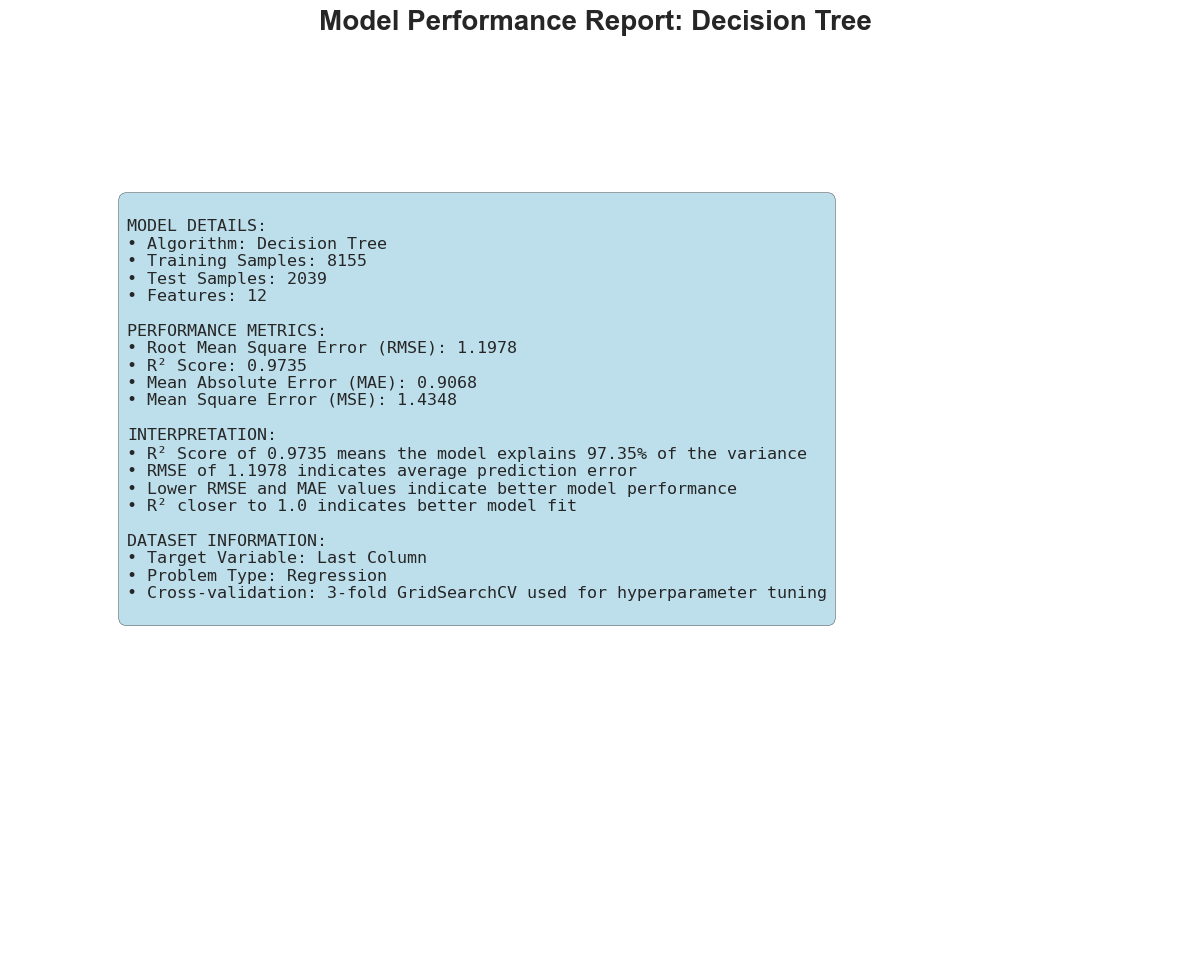

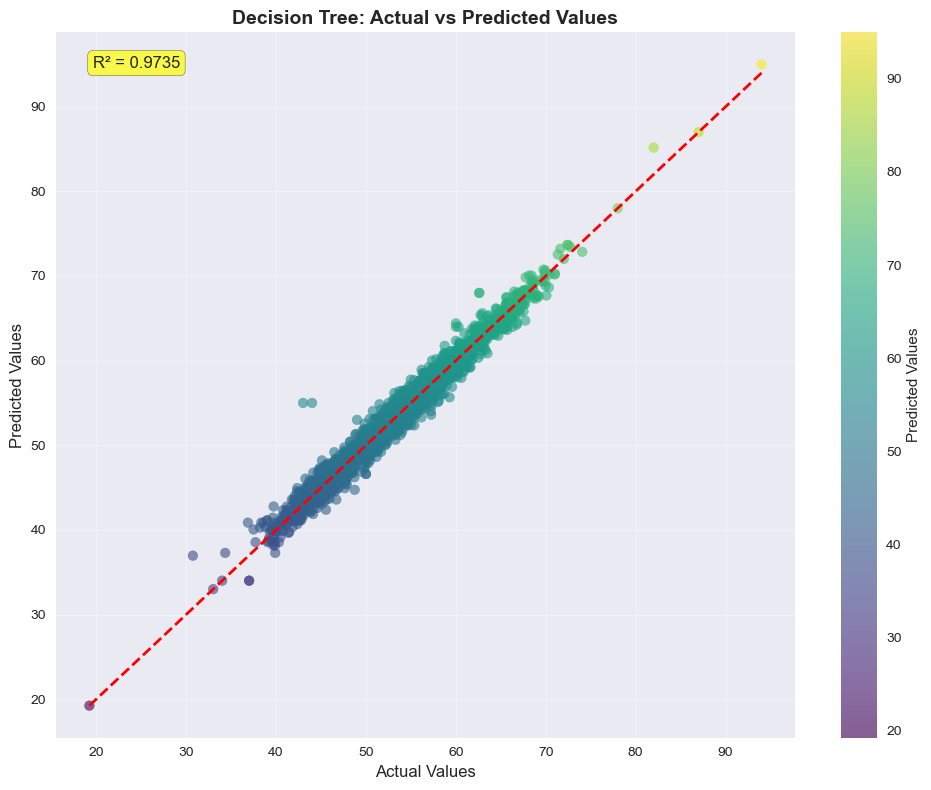

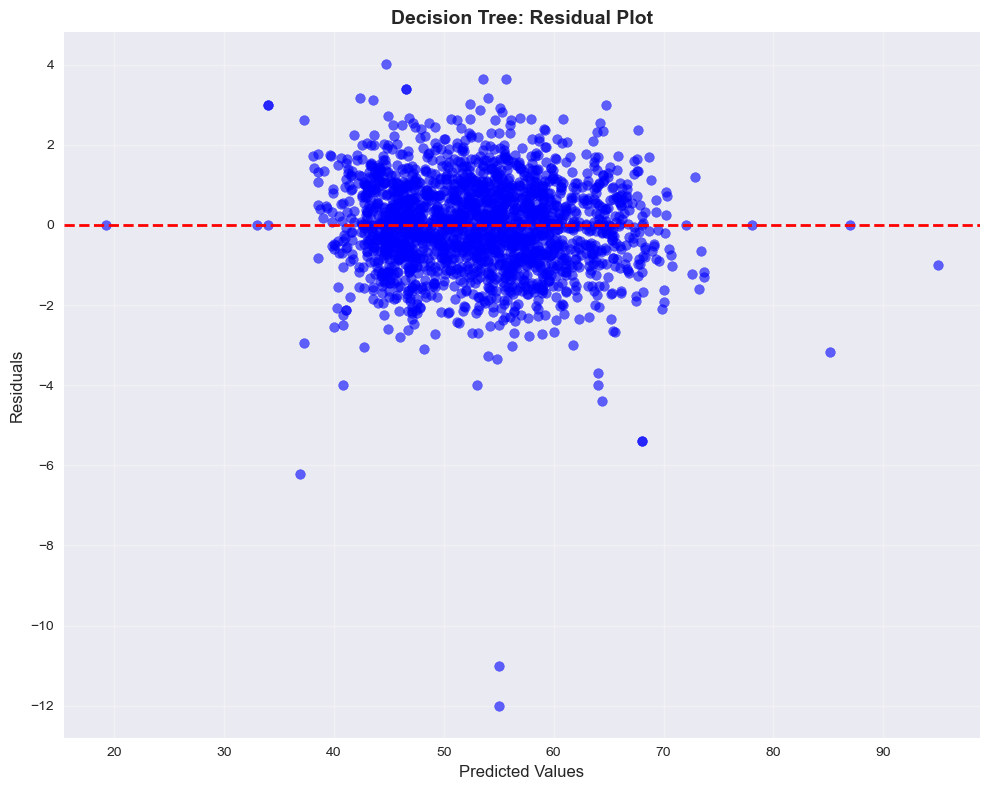

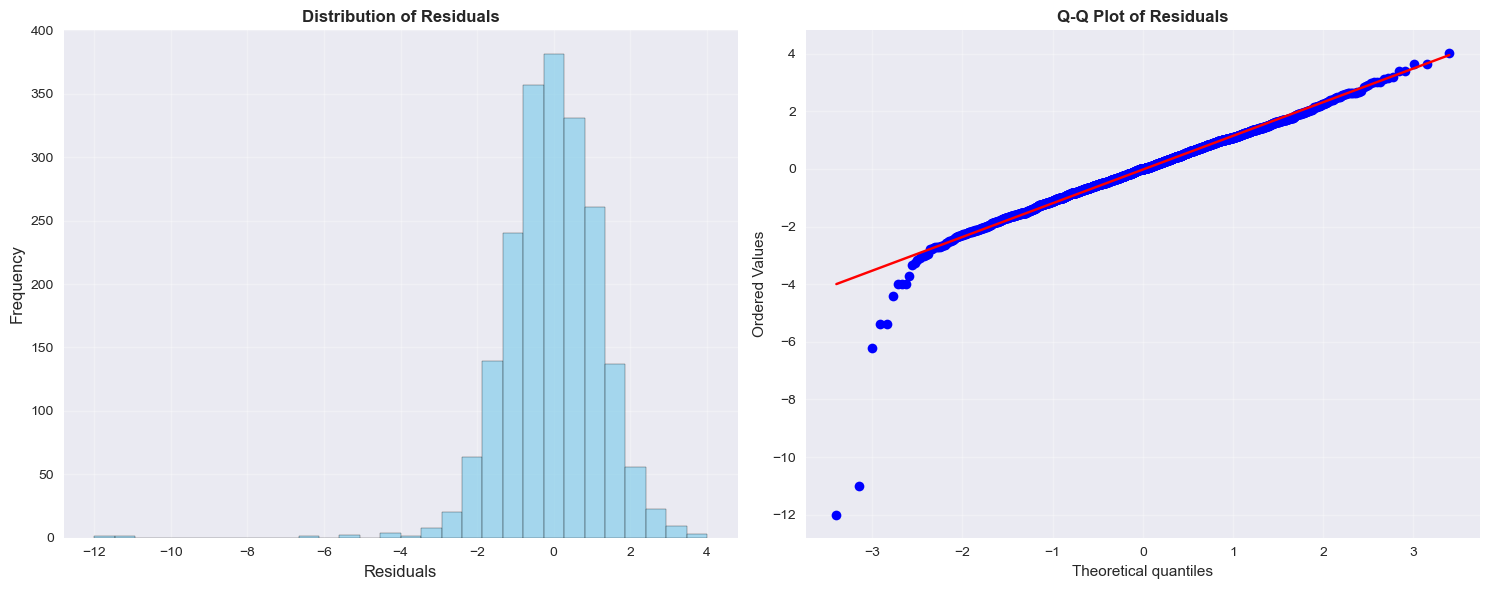

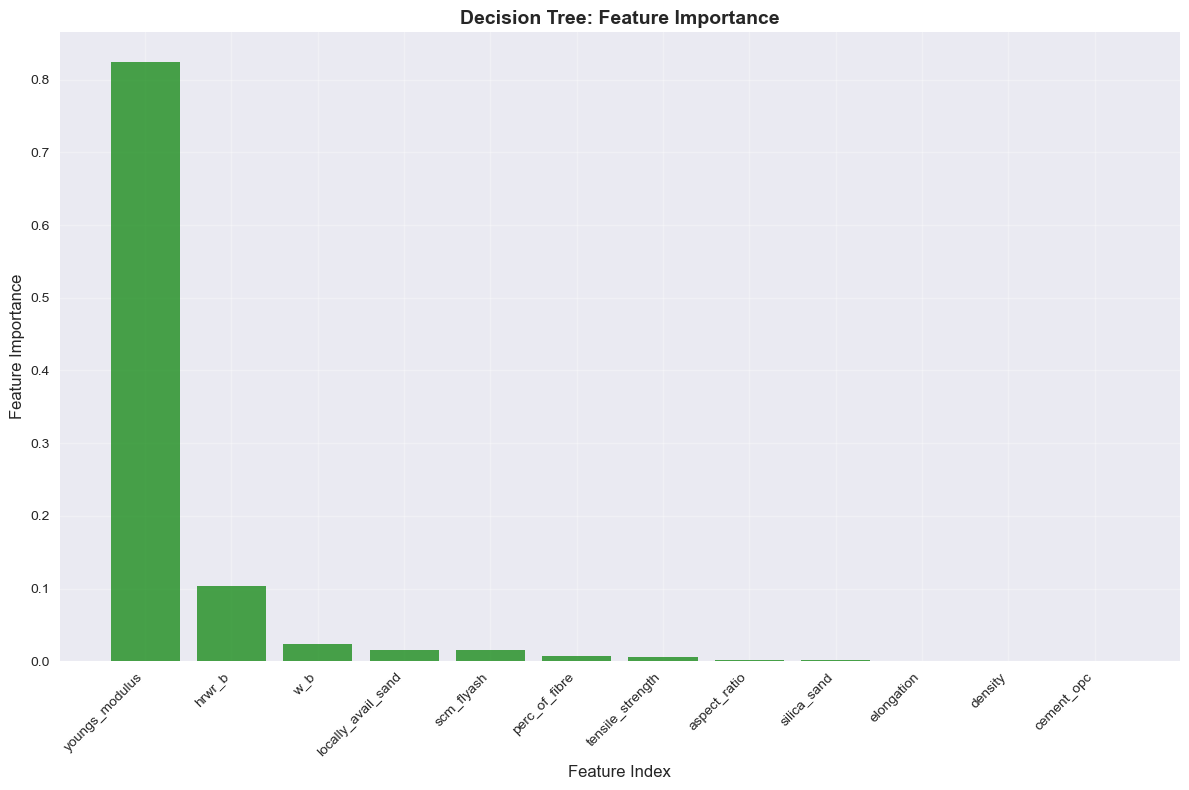

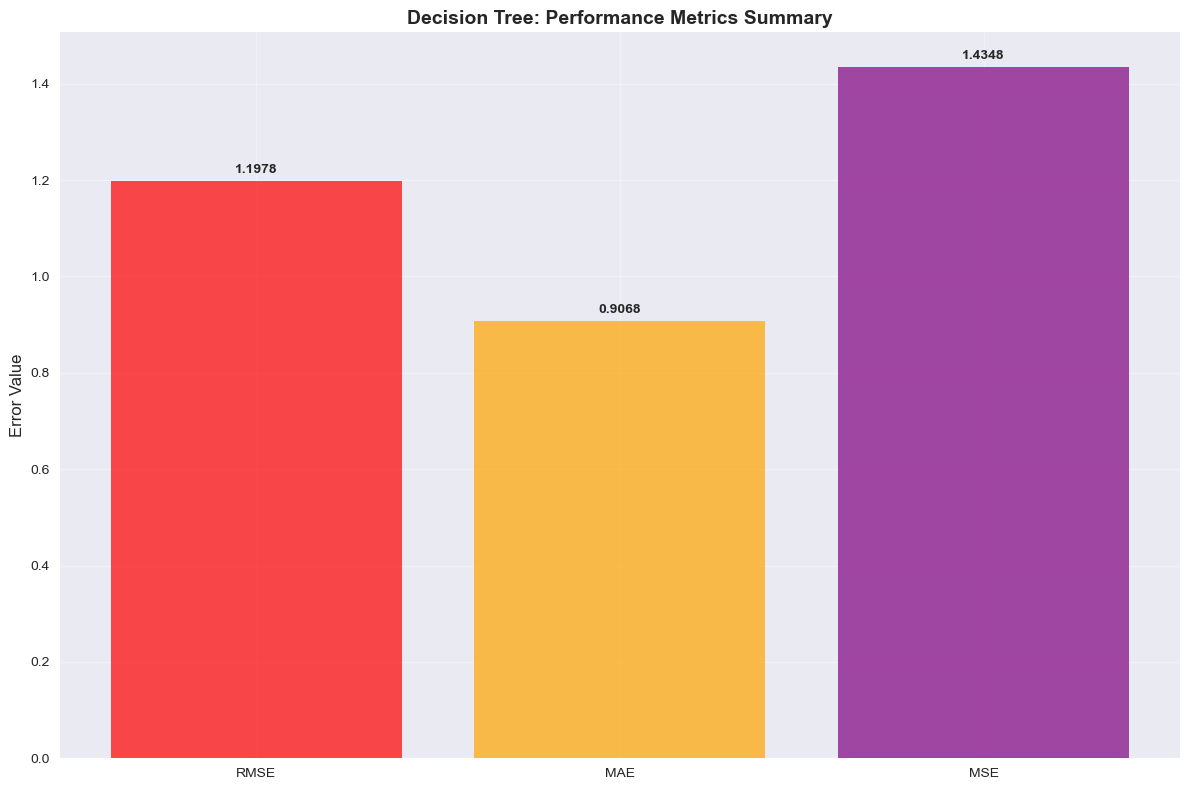


🎉 Process completed successfully!
📊 Model: Decision Tree
📄 Report: decision_tree_model_report.pdf
📈 R² Score: 0.9735
📉 RMSE: 1.1978


In [53]:
# Generate comprehensive PDF report with plots
pdf_filename = generate_pdf_report(selector)

if pdf_filename:
    print(f"\n🎉 Process completed successfully!")
    print(f"📊 Model: {selector.models[selector.selected_model][0]}")
    print(f"📄 Report: {pdf_filename}")
    print(f"📈 R² Score: {selector.metrics['R2']:.4f}")
    print(f"📉 RMSE: {selector.metrics['RMSE']:.4f}")

## 11. Quick Model Comparison (Optional)

Run this cell to quickly test multiple models for comparison.

In [54]:
# # Optional: Quick comparison of multiple models
# def quick_comparison(data_path, model_ids=[1, 2, 5, 6]):
#     """Quickly compare multiple models"""
#     results = []
    
#     for model_id in model_ids:
#         print(f"\n🔄 Testing Model {model_id}...")
        
#         # Create new selector for each model
#         temp_selector = InteractiveModelSelector(data_path)
#         temp_selector.load_data()
#         temp_selector.select_model(model_id)
#         temp_selector.train_model()
        
#         results.append({
#             'Model': temp_selector.models[model_id][0],
#             'R2': temp_selector.metrics['R2'],
#             'RMSE': temp_selector.metrics['RMSE'],
#             'MAE': temp_selector.metrics['MAE']
#         })
    
#     # Display results
#     comparison_df = pd.DataFrame(results)
#     comparison_df = comparison_df.sort_values('R2', ascending=False)
    
#     print("\n📊 Model Comparison Results:")
#     display(comparison_df)
    
#     return comparison_df

# comparison_results = quick_comparison(DATA_PATH, [1, 2, 5, 6, 8])

In [55]:
# Get feature names for validation
expected_features = list(selector.X_train.columns)

# Get the actual model name from the models dictionary
model_id = selector.selected_model  # This is an integer (1-10)
model_name = selector.models[model_id][0]  # This gets the actual name string

print(f"Model ID: {model_id}")
print(f"Model Name: {model_name}")

# Create model package with metadata
model_package = {
    'model': selector.trained_model,
    'expected_features': expected_features,
    'model_name': model_name,  # Use the actual name string
    'model_id': model_id,      # Also save the ID for reference
    'feature_names': expected_features,
    'training_metrics': selector.metrics,
    'model_type': type(selector.trained_model).__name__
}

# Create filename using the model name string
filename = f"{model_name.replace(' ', '_').lower()}_model.pkl"

# Save the complete model package
import joblib
joblib.dump(model_package, filename)
print(f"✅ Model saved as: {filename}")
print(f"📊 Saved with {len(expected_features)} features and training metrics")

Model ID: 8
Model Name: Decision Tree
✅ Model saved as: decision_tree_model.pkl
📊 Saved with 12 features and training metrics
